In [1]:
import json
from random import randint
from datetime import datetime
from wordcloud import WordCloud
import matplotlib.pyplot as plt

path = "./questions_eda.json"

try:
    with open(path, "r", encoding="utf-8") as file:
        data = json.load(file)
        if isinstance(data, list) and all("question" in item and "answer" in item for item in data):
            questions = data
        else:
            print("Error: Unexpected JSON format. Expected a list of objects with 'question' and 'answer' keys.")
            questions = []
except FileNotFoundError:
    print(f"Error: File {path} not found.")
    questions = []
except json.JSONDecodeError:
    print(f"Error: Failed to decode JSON from {path}.")
    questions = []

choice = 0
correct = 0 
asked = 0
practice_more = []
wordcloud_data = []
results = "0/0"

while choice != "2":
    choice = input("1) Ask a question\n2) Quit\n")
    print("----------------------------------------")
    if choice == "1":
        if questions:
            question_start = 0
            question_end = len(questions) - 1
            select_question = randint(question_start, question_end)
            selected = questions[select_question]  # Access the dictionary at the selected index
            print(f"Question: {selected['question']}")
            print("----------------------------------------")
            answer = input("Want to see the answer? y/n\n")
            print("----------------------------------------")
            if answer.lower() == "y":
                print(f"Answer: {selected['answer']}")
            print("----------------------------------------")
            answered_correctly = input("Did you answer correctly? y/n\n")
            print("----------------------------------------")
            if answered_correctly.lower() == "y":
                correct += 1
                asked += 1
            else:
                asked += 1
                practice_more.append(selected)
                wordcloud_data.append(selected["question"])
            results = f"Results: {correct}/{asked}"
            print(results)
            print("----------------------------------------")
            answer_again = input("Do you want to see this question again? y/n\n")
            if answer_again.lower() == "n":
                questions.remove(selected)
            print(f"Questions left: {len(questions)}")
        else:
            print("No questions available.")
            
print_input = input("Would you like to save your results? y/n\n")
if print_input.lower() == "y":
    filename = f"{datetime.now().strftime('%Y-%m-%d_%H-%M-%S')}.md"  # Format datetime to exclude invalid characters
    with open(filename, 'w', encoding='utf-8') as f:
        f.write(f"## Results\n")
        f.write(f"Questions answered: {results}\n")
        f.write("## Hard Questions\n")
        for item in practice_more:
            f.write(f"- Question: {item['question']}\n")
            f.write(f"  Answer: {item['answer']}\n\n")
    

----------------------------------------
Question: Vilka huvudtyper av data finns det?
----------------------------------------
----------------------------------------
Answer: Kategorisk (nominell, ordinal), numerisk (diskret, kontinuerlig), och ibland text eller tidsseriedata.
----------------------------------------
----------------------------------------
Results: 0/1
----------------------------------------
Questions left: 46
----------------------------------------
Question: Du har en datamängd där vissa rader saknar värden i flera kolumner. Vad gör du?
----------------------------------------
----------------------------------------
Answer: Jag analyserar mönstret i de saknade värdena, tar bort rader med mycket saknat eller fyller i med rimliga metoder som medelvärde eller imputering.
----------------------------------------
----------------------------------------
Results: 0/2
----------------------------------------
Questions left: 45
----------------------------------------


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


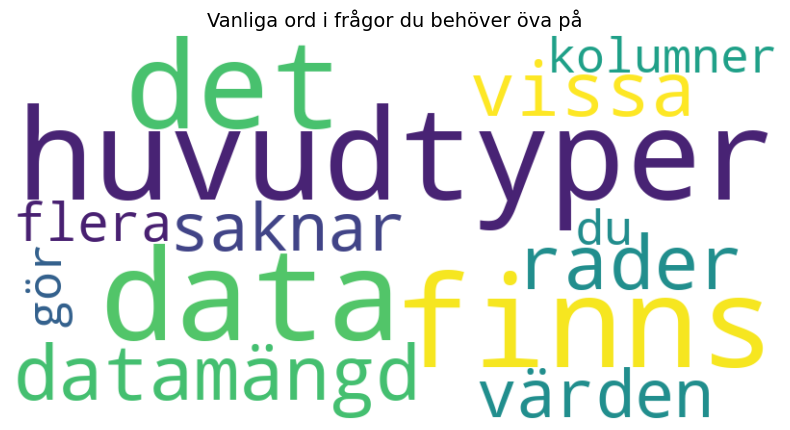

In [2]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

swedish_stopwords = set(stopwords.words('swedish'))

if not practice_more:
    print("No missed questions! No word cloud to generate.")
else:
    # Extract questions and filter out Swedish stopwords
    raw_text = " ".join(item["question"] for item in practice_more)
    filtered_text = " ".join(
        word for word in raw_text.split() if word.lower() not in swedish_stopwords
    )

    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(filtered_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Vanliga ord i frågor du behöver öva på", fontsize=14)
    plt.show()
